In [4]:

import sys
sys.path.insert(0, "../")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from datasets import SatelliteSegmentationDataset
from dataloaders import get_train_val_loaders
from transforms import get_train_augmentation, get_validation_augmentation
from visualisations import tensor_to_rgb
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Confirm dataset is working

In [5]:
data_dir = Path('/media/wwymak/Storage/spacenet/AOI_3_Paris_Train')
image_dir = data_dir / 'RGB-PanSharpen'
mask_dir = data_dir / 'masks'
summary_data = data_dir / 'summaryData' / 'AOI_3_Paris_Train_Building_Solutions.csv'
summary_data_df = pd.read_csv(summary_data)
image_ids = summary_data_df.ImageId.unique()
np.random.shuffle(image_ids)

In [6]:
satellite = SatelliteSegmentationDataset(image_dir=image_dir, mask_dir=mask_dir, image_id_list=image_ids)

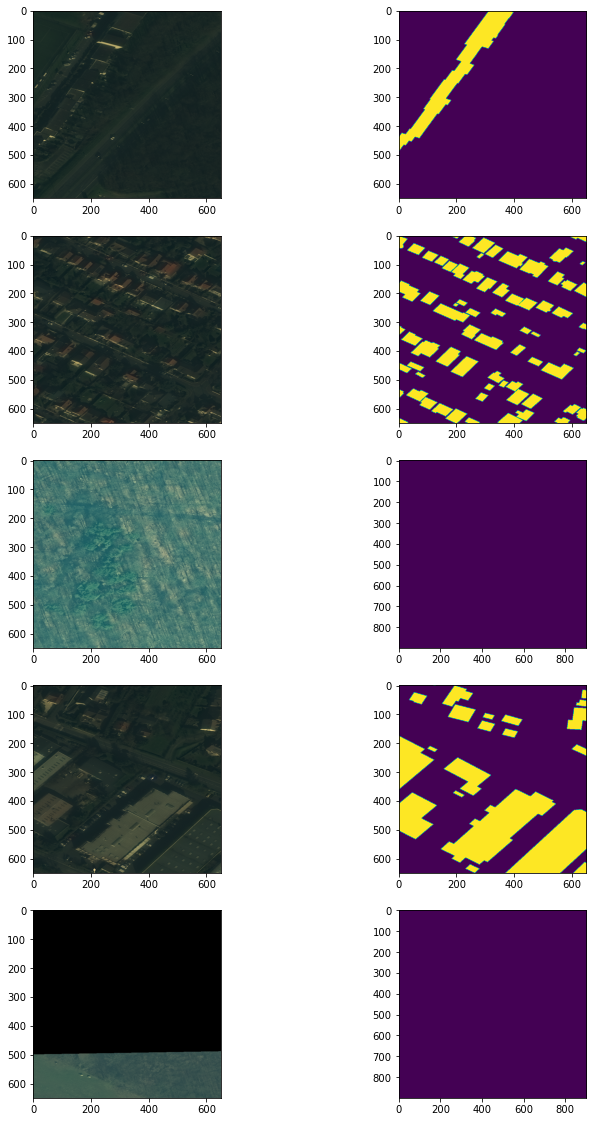

In [7]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 4 * 5))

for i in range(5):
    sample = satellite[i]
    image = sample['image']
    mask = sample['mask']

    axs[i, 0].imshow(image)
    axs[i, 1].imshow(mask)

In [8]:
train_loader, val_loader, train_val_loader = get_train_val_loaders(
    image_dir = image_dir,
    mask_dir= mask_dir,
    summary_data_filepath=summary_data,
    train_transforms= get_train_augmentation(),
    val_transforms= get_validation_augmentation(),
    train_ratio= 0.8,
    batch_size=4,
    num_workers = 8
)

In [9]:
batch_train = (next(iter(train_loader)))

In [10]:
batch_train['image'].shape, batch_train['mask'].shape

(torch.Size([4, 3, 256, 256]), torch.Size([4, 256, 256]))

In [11]:
batch_train['mask'].max(), batch_train['mask'].min(), batch_train['mask'].dtype

(tensor(1, dtype=torch.uint8), tensor(0, dtype=torch.uint8), torch.uint8)

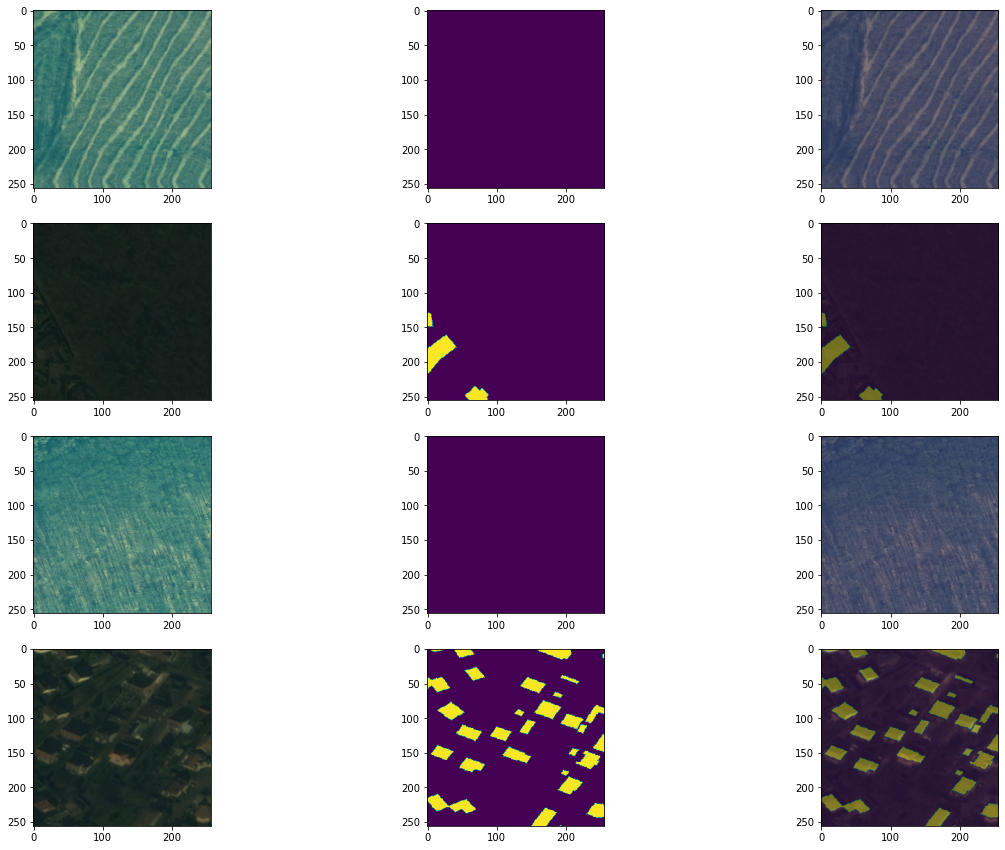

In [12]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(4 * 5, 3 * 5))
for i in range(batch_train['image'].shape[0]):
    axs[i, 0].imshow(tensor_to_rgb(batch_train['image'][i]))
    axs[i, 1].imshow(batch_train['mask'][i])
    axs[i, 2].imshow(tensor_to_rgb(batch_train['image'][i]))
    axs[i, 2].imshow(batch_train['mask'][i], alpha=0.4)